In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Data Analysis

In [3]:
df = pd.read_csv("./dataset/long_data_.csv")
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [4]:
df.tail()

,States,Regions,latitude,longitude,Dates,Usage
16594,Manipur,NER,24.799971,93.950017,05/12/2020 00:00:00,2.5
16595,Meghalaya,NER,25.570492,91.880014,05/12/2020 00:00:00,5.8
16596,Mizoram,NER,23.710399,92.720015,05/12/2020 00:00:00,1.6
16597,Nagaland,NER,25.666998,94.116570,05/12/2020 00:00:00,2.1
16598,Tripura,NER,23.835404,91.279999,05/12/2020 00:00:00,3.3


In [5]:
len(df)

16599

In [6]:
df.isna().sum()

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

In [7]:
df.dtypes

States        object
Regions       object
latitude     float64
longitude    float64
Dates         object
Usage        float64
dtype: object

In [9]:
states = df["States"].unique()
states

array(['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype=object)

In [10]:
len(states)

33

In [11]:
df["Dates"] = pd.to_datetime(df["Dates"], dayfirst=True)
df["year"]=df["Dates"].dt.year
df["month"]=df["Dates"].dt.month
df["day"]=df["Dates"].dt.day
df.drop(["latitude","longitude"],axis=1,inplace=True)

In [12]:
def plot_usage(state):
    fig,ax = plt.subplots(figsize = (20,5))

    ax.plot(df[df["States"] == state]["Dates"], df[df["States"] == state]["Usage"])
    plt.xticks(rotation = 60)
    plt.show()

    


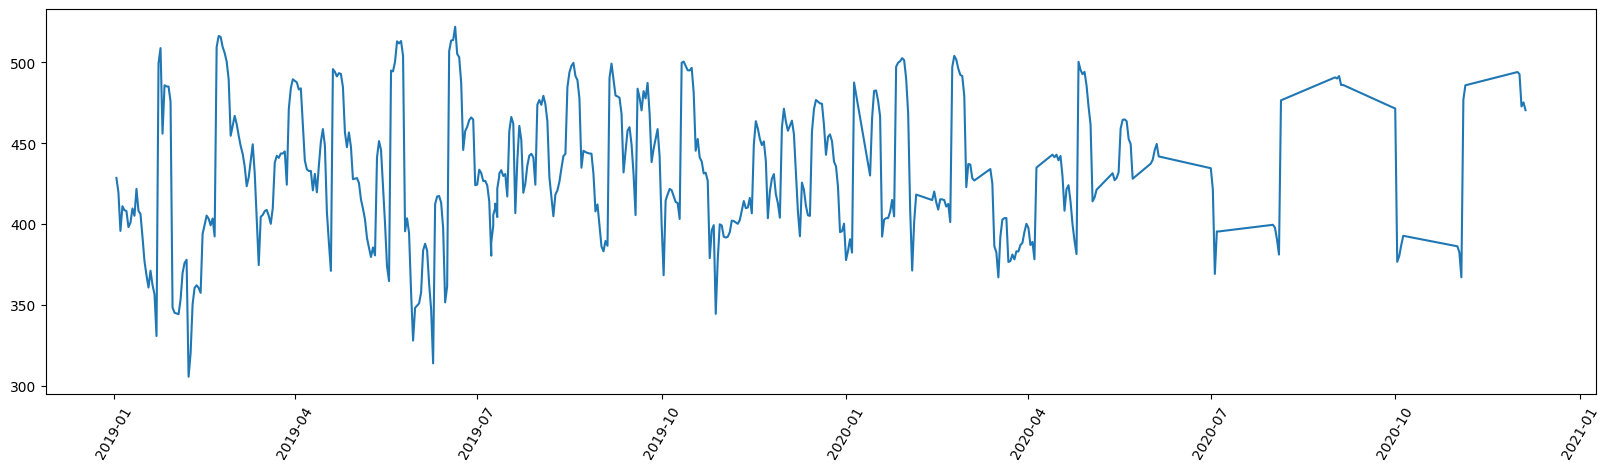

In [13]:
plot_usage("Maharashtra")

In [14]:
df.groupby(['Regions',"year"])['Usage'].sum()

Regions  year
ER       2019    117915.1
         2020     46799.4
NER      2019     15519.7
         2020      6190.7
NR       2019    358694.8
         2020    147559.8
SR       2019    338795.2
         2020    137883.4
WR       2019    385280.5
         2020    155089.3
Name: Usage, dtype: float64

### Comparision of usage by region in 2020 and 2019

In [15]:

usage_2020 = {}
for region in df["Regions"].unique():
    usage_2020[region]  = df[(df["Regions"] == region)&(df["year"] == 2020)]["Usage"].sum()
    
usage_2019 = {}
for region in df["Regions"].unique():
    usage_2019[region]  = df[(df["Regions"] == region)&(df["year"] == 2020)]["Usage"].sum()

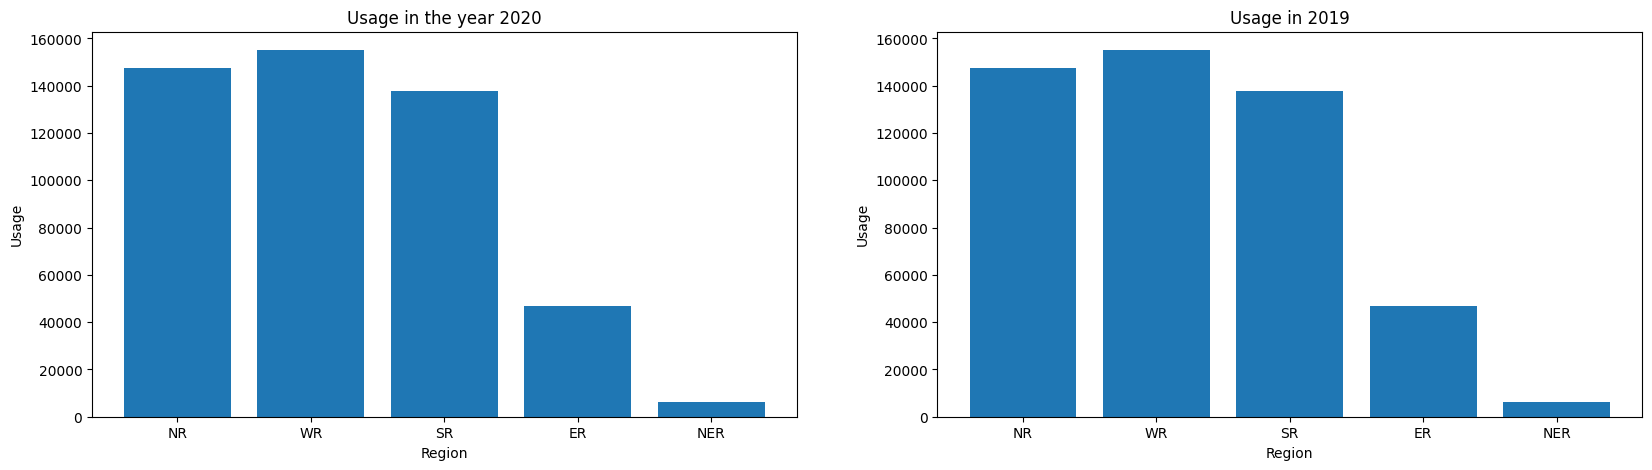

In [16]:
fig,((ax1,ax2)) = plt.subplots(nrows= 1, ncols= 2,figsize = (20,5))

ax1.bar(usage_2020.keys(),usage_2020.values())
ax1.set(title = "Usage in the year 2020",
       xlabel = "Region",
       ylabel = "Usage")

ax2.bar(usage_2019.keys(),usage_2019.values())
ax2.set(title = "Usage in 2019",
       xlabel = "Region",
       ylabel = "Usage");

### Comparision of usage by state in 2020 and 2019

In [17]:
state_2020 = {}
for state in states:
    state_2020[state] = df[(df["States"] == state)&(df["year"] ==2020)]["Usage"].sum()

state_2019 = {}
for state in states:
    state_2019[state] = df[(df["States"] == state)&(df["year"] == 2019)]["Usage"].sum()

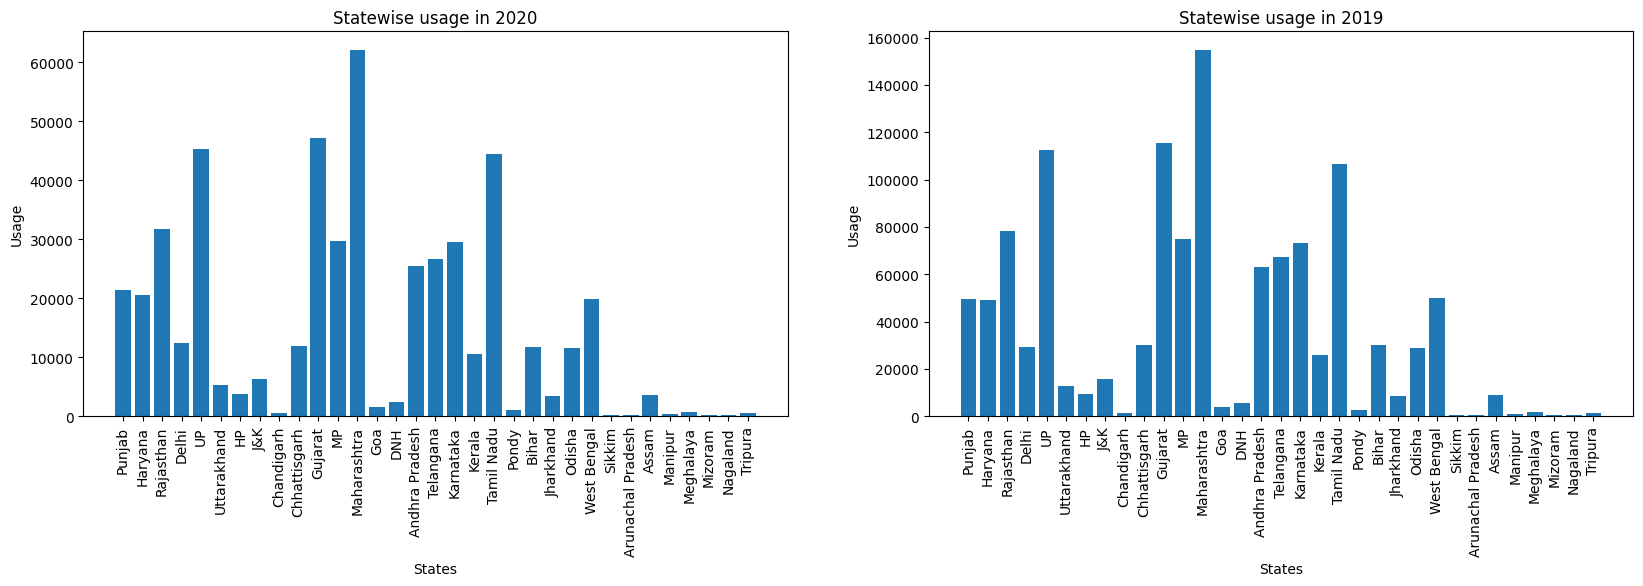

In [18]:
fig,((ax1,ax2)) = plt.subplots(nrows = 1,
                              ncols = 2,
                              figsize = (20,5))


ax1.bar(state_2020.keys(),state_2020.values())
ax1.set(title = "Statewise usage in 2020",
       xlabel = "States",
       ylabel = "Usage")
ax1.set_xticklabels(state_2020.keys(), rotation=90)


plt.xticks(rotation = 90)
ax2.bar(state_2019.keys(),state_2019.values())
ax2.set(title="Statewise usage in 2019",
       xlabel = "States",
       ylabel = "Usage");
ax2.set_xticklabels(state_2019.keys() ,rotation=90);


### Top 10 states with most electricity consumption in 2020 and 2019

In [19]:
usage2020 = pd.DataFrame.from_dict(state_2020, orient="index")
usage2019 = pd.DataFrame.from_dict(state_2019, orient = "index")

In [20]:
usage2020.rename(columns= {0:"Usage"},inplace=True)
usage2019.rename(columns = {0:"Usage"}, inplace=True)

In [21]:
usage2020.head()


,Usage
Punjab,21360.5
Haryana,20586.8
Rajasthan,31738.2
Delhi,12482.2
UP,45270.4


In [22]:
usage2020.sort_values(by=["Usage"],ascending=False,inplace=True)
usage2019.sort_values(by=["Usage"],ascending=False,inplace =True)

In [23]:
print("Usage in 2020")
usage2020.head(10)

Usage in 2020


,Usage
Maharashtra,62163.1
Gujarat,47131.5
UP,45270.4
Tamil Nadu,44551.3
Rajasthan,31738.2
MP,29791.8
Karnataka,29588.8
Telangana,26615.7
Andhra Pradesh,25507.4
Punjab,21360.5


In [24]:
print("Usage in 2019")
usage2019.head(10)

Usage in 2019


,Usage
Maharashtra,154916.7
Gujarat,115357.4
UP,112689.9
Tamil Nadu,106720.2
Rajasthan,78138.8
MP,74974.6
Karnataka,73076.9
Telangana,67449.6
Andhra Pradesh,63097.0
West Bengal,49868.7


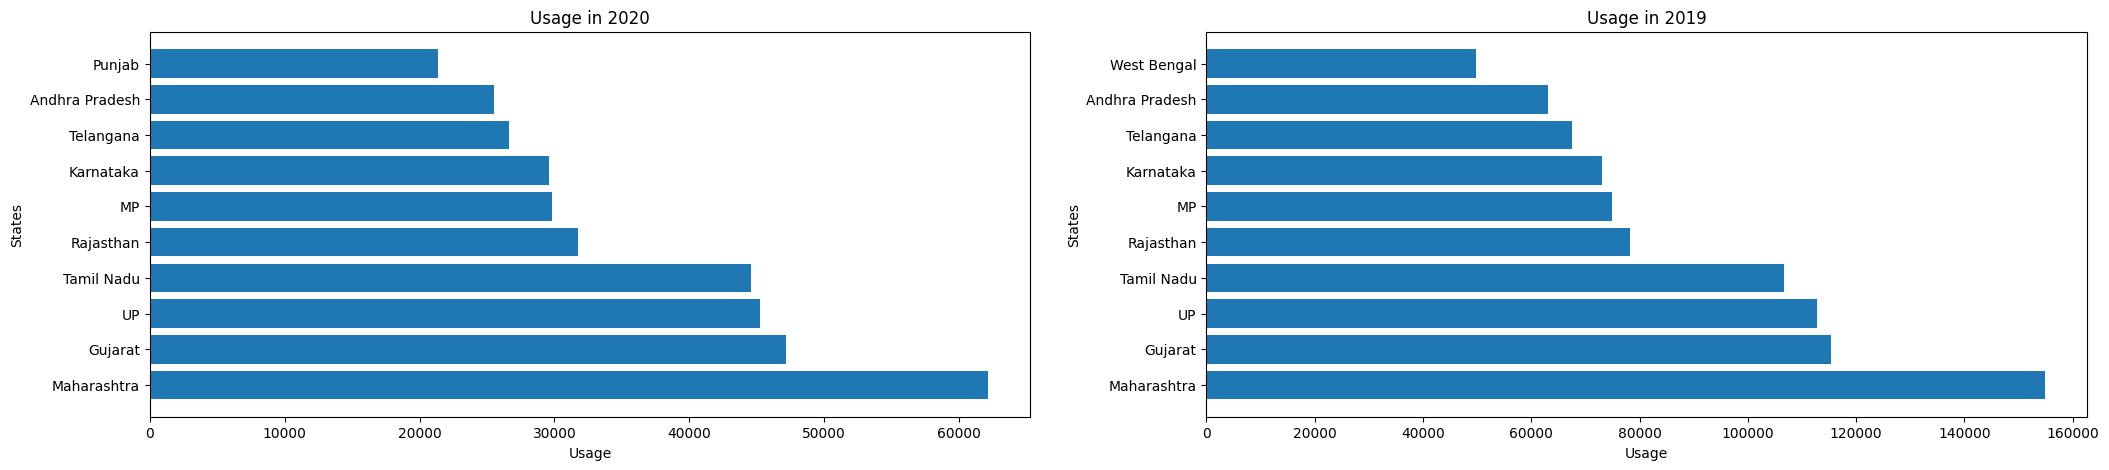

In [25]:
fig,((ax1,ax2)) = plt.subplots(nrows = 1,
                              ncols = 2,
                              figsize = (25,5))

ax1.barh(usage2020.head(10).index, usage2020.head(10)["Usage"])
ax1.set(title = "Usage in 2020",
       xlabel = "Usage",
        ylabel = "States")

ax2.barh(usage2019.head(10).index, usage2019.head(10)["Usage"])
ax2.set(title="Usage in 2019",
       xlabel = "Usage",
       ylabel = "States");

In [26]:
print("Usage in 2020")
usage2020.tail(10).sort_values(by=["Usage"])

Usage in 2020


,Usage
Sikkim,182.2
Mizoram,244.0
Arunachal Pradesh,306.9
Nagaland,310.9
Manipur,360.2
Tripura,572.5
Chandigarh,610.8
Meghalaya,820.7
Pondy,1105.6
Goa,1573.4


In [27]:
print("Usage in 2019")
usage2019.tail(10).sort_values(by= ["Usage"])

Usage in 2019


,Usage
Sikkim,466.4
Mizoram,614.3
Arunachal Pradesh,754.0
Nagaland,776.8
Manipur,894.6
Chandigarh,1472.4
Tripura,1482.5
Meghalaya,2018.1
Pondy,2653.3
Goa,4006.5


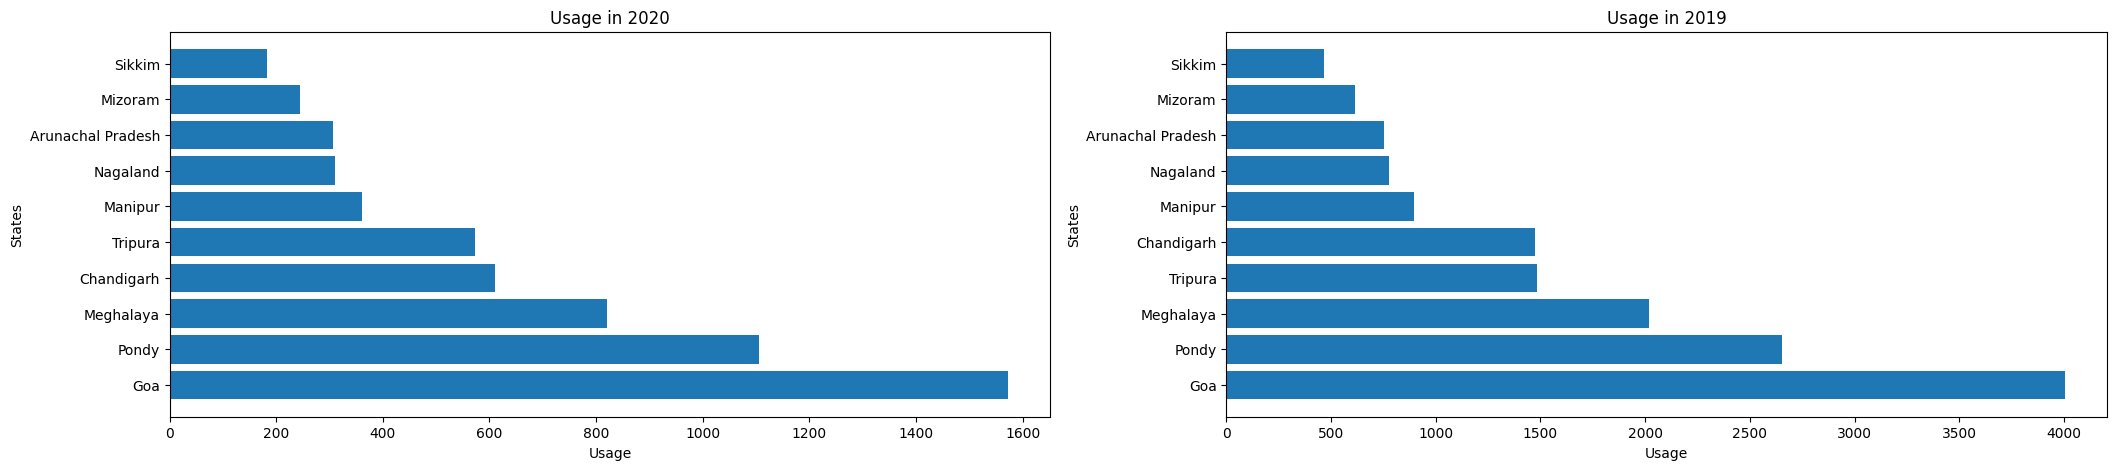

In [28]:
fig,((ax1,ax2)) = plt.subplots(nrows=1,
                              ncols = 2,
                              figsize = (25,5))

ax1.barh(usage2020.tail(10).index, usage2020.tail(10)["Usage"])
ax1.set(title = "Usage in 2020",
       xlabel = "Usage",
       ylabel="States")

ax2.barh(usage2019.tail(10).index, usage2019.tail(10)["Usage"])
ax2.set(title = "Usage in 2019",
       xlabel = "Usage",
       ylabel = "States");